# Distribution Plots

In [1]:
import seaborn as sns
sns.set()

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips') #tips is one of the in-built dataset you can directly load in seaborn

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot: xlabel='total_bill'>

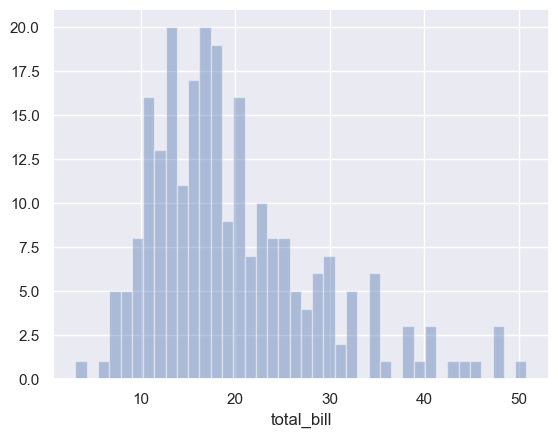

In [6]:
sns.distplot(tips['total_bill'], kde = False, bins = 40) 
#kernel density estimation line can be removed with kde=False

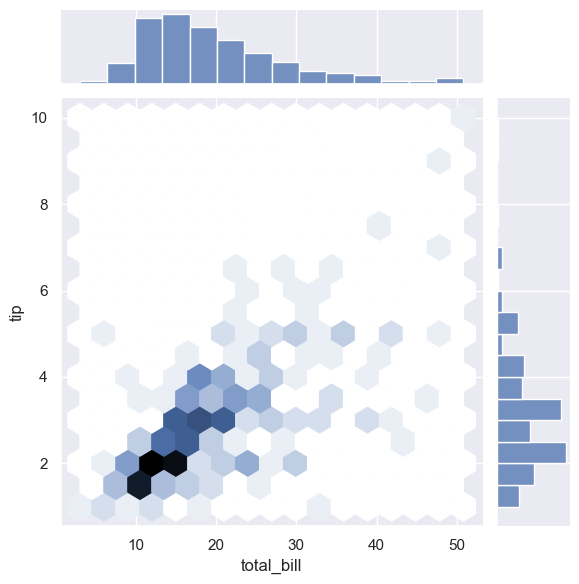

In [7]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex' ) # kind by default is a scatter.. hex reg kde

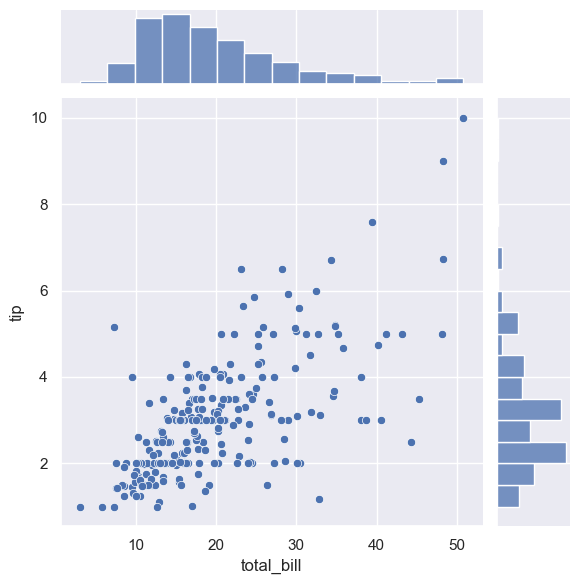

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips)

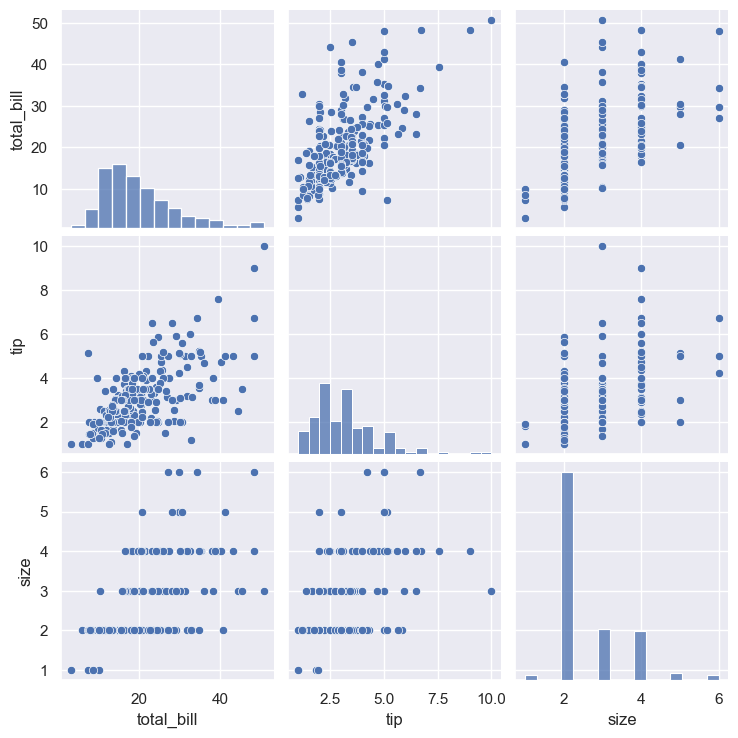

In [9]:
sns.pairplot(tips) #plots for all numerical variables same variable with itself instead of scatterplot shows an histogram

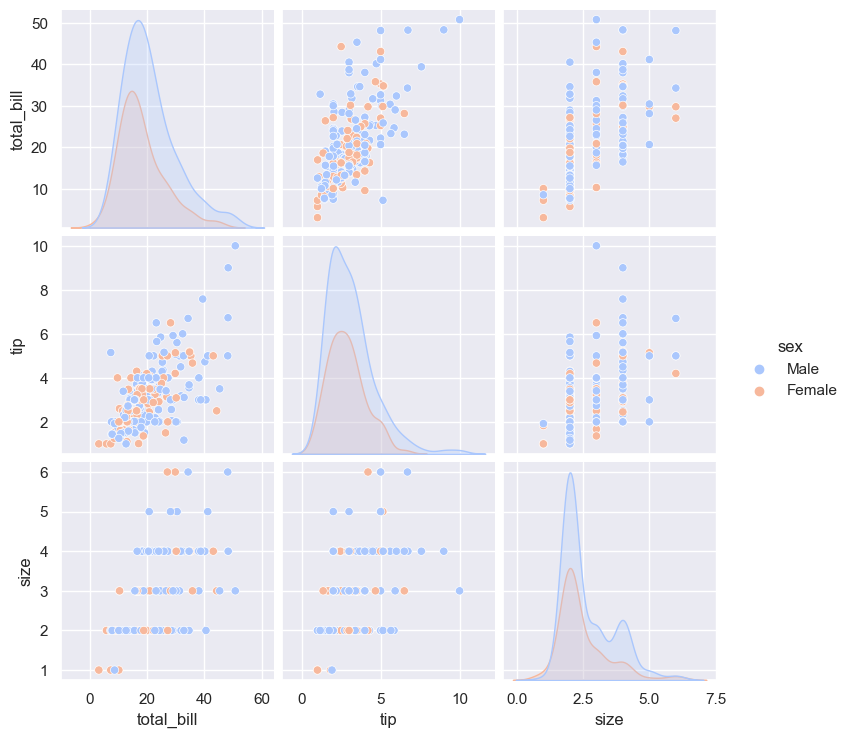

In [10]:
sns.pairplot(tips, hue='sex', palette='coolwarm') #hue is for categorical columns

<AxesSubplot: xlabel='total_bill'>

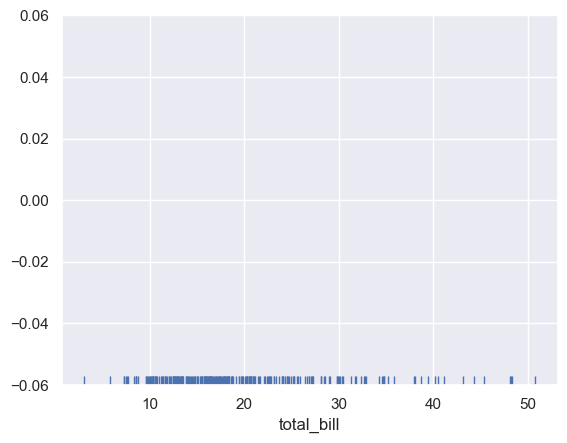

In [11]:
sns.rugplot(tips['total_bill']) # draws a dash mark for every points on this uniform or unique variant distribution

<AxesSubplot: xlabel='total_bill'>

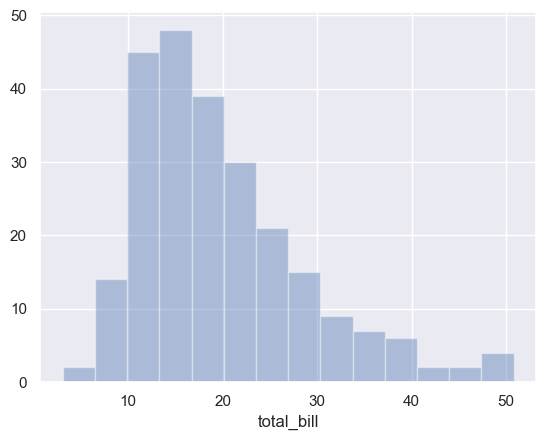

In [12]:
sns.distplot(tips['total_bill'], kde=False)

(0.0, 1.0)

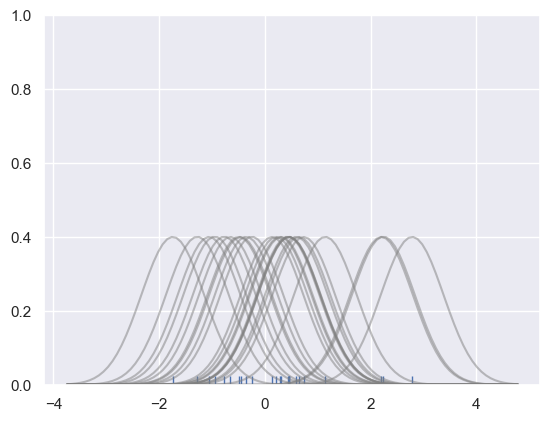

In [13]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)



Text(0.5, 0.98, 'Sum of the Basis Functions')

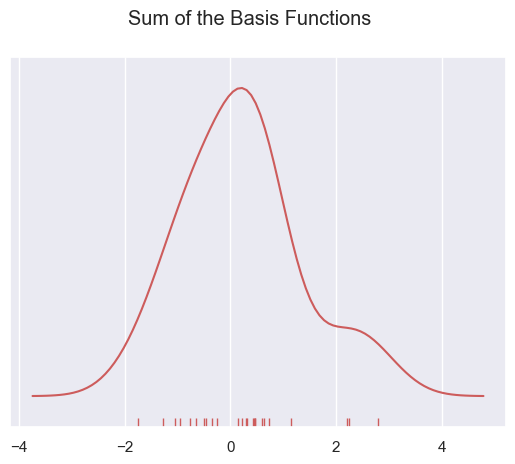

In [14]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

<AxesSubplot: xlabel='total_bill', ylabel='Density'>

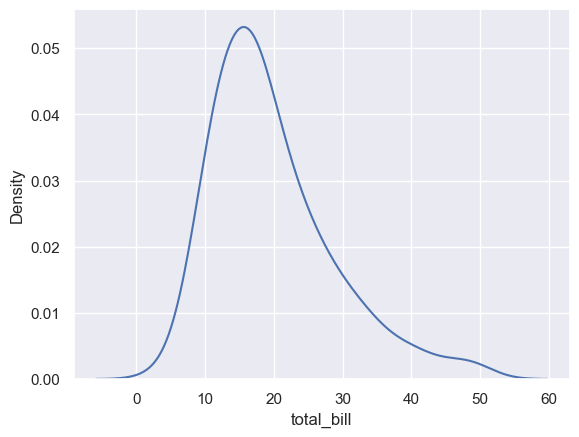

In [15]:
sns.kdeplot(tips['total_bill'])
#sns.rugplot(tips['total_bill'])

<AxesSubplot: xlabel='tip', ylabel='Density'>

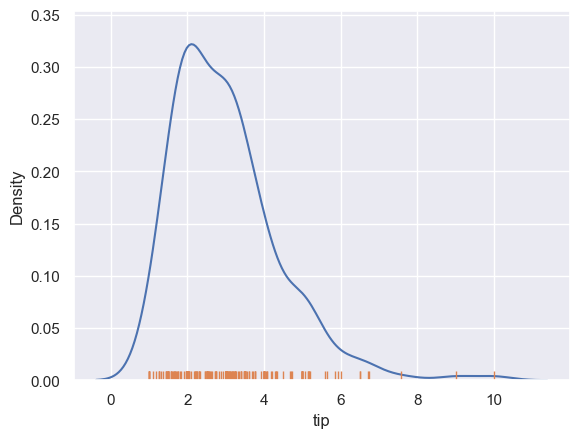

In [16]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Plots

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='sex', ylabel='total_bill'>

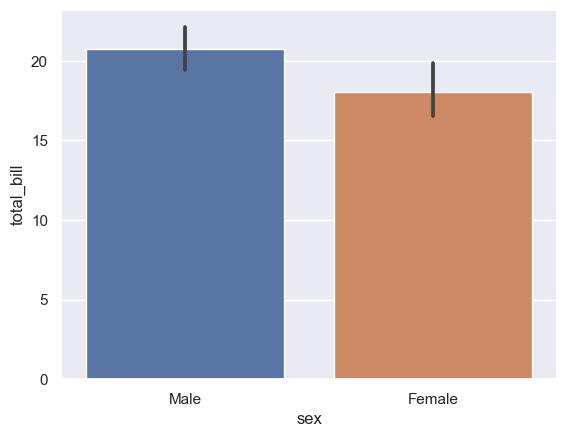

In [18]:
sns.barplot(x='sex', y='total_bill', data=tips) #shows the average or mean per categorical column

In [19]:
import numpy as np

<AxesSubplot: xlabel='sex', ylabel='total_bill'>

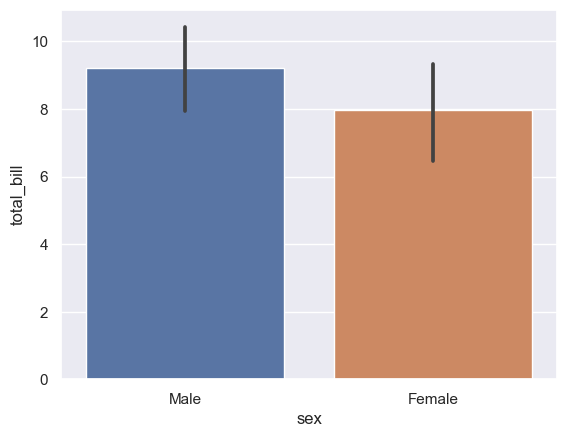

In [20]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std) # with estimator yo can estimate for example 
                                                                  # the standard deviation per categorical column

<AxesSubplot: xlabel='sex', ylabel='count'>

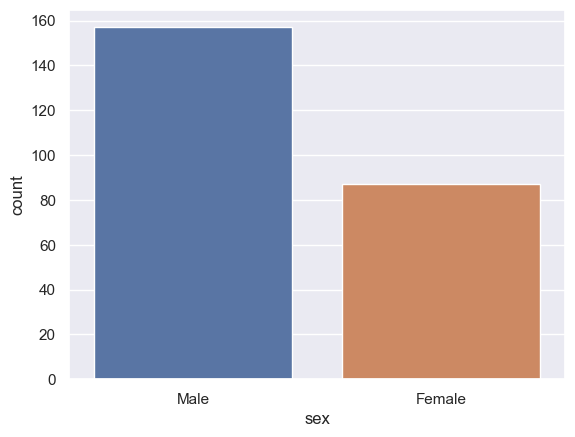

In [21]:
sns.countplot(x='sex', data=tips) #same than barplot but the estimator just count the number of occurrences. Just set x value.

In [22]:
tips['sex'].value_counts() #this is the same than countplot

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot: xlabel='day', ylabel='total_bill'>

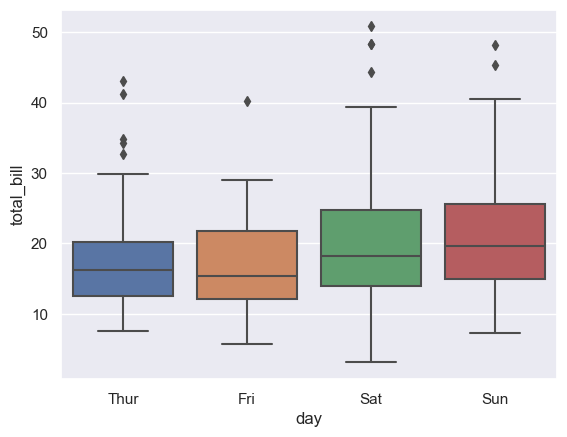

In [23]:
sns.boxplot(x='day',y='total_bill', data=tips)  # Shows the quartiles of the dataset. 
                                                # The points outside of the whiskers are determined to be outliers

<AxesSubplot: xlabel='day', ylabel='total_bill'>

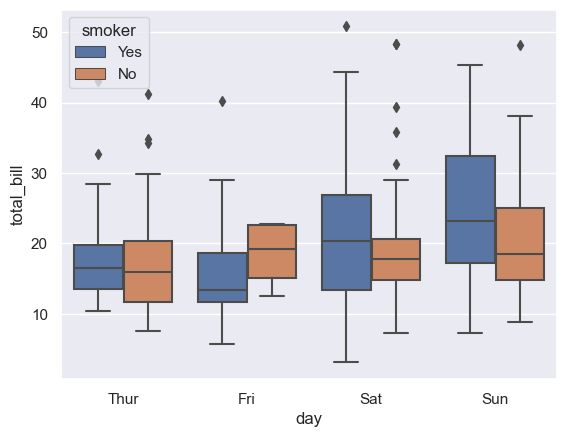

In [24]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker') 
#split per day but with hue split by another categorical variable too

<AxesSubplot: xlabel='day', ylabel='total_bill'>

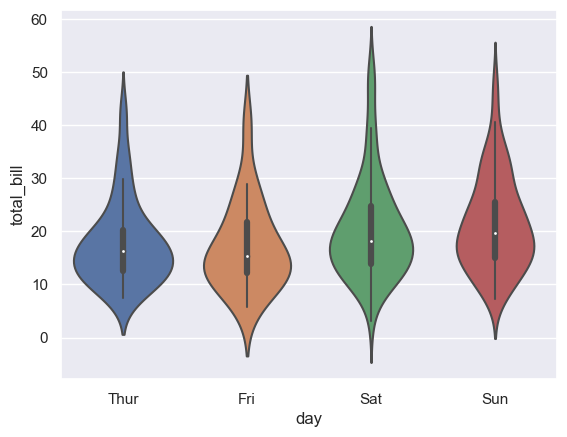

In [25]:
sns.violinplot(x='day',y='total_bill', data=tips) #very related to boxplot, but violinplot shows a litlle more information. 
#However it is a litlle harder to interpret o read.
#Violinplot shows the kernel density estimation of the underlying distribution. 
#So it shows if we can split in half the distribution points on its side.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

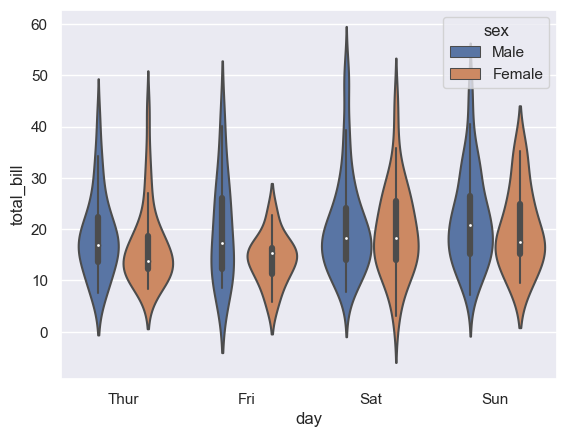

In [26]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='sex')

<AxesSubplot: xlabel='day', ylabel='total_bill'>

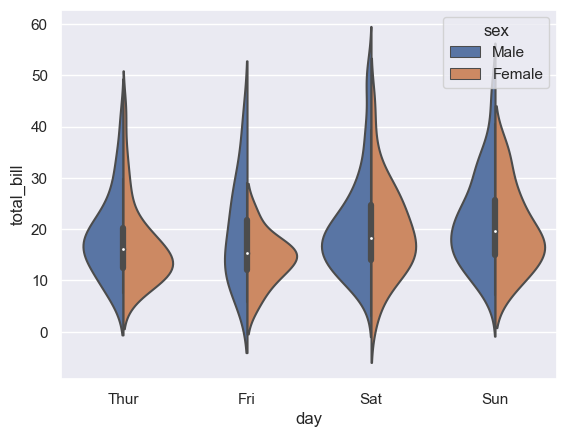

In [27]:
sns.violinplot(x='day',y='total_bill', data=tips, hue='sex', split=True)
#with split can compare distributions based in another category and see how the 
#categories themselves on the z axis compare to each other.
#However it is a litlle harder to interpret o read. So we need to know the audience to show the advance visualizations.

<AxesSubplot: xlabel='day', ylabel='total_bill'>

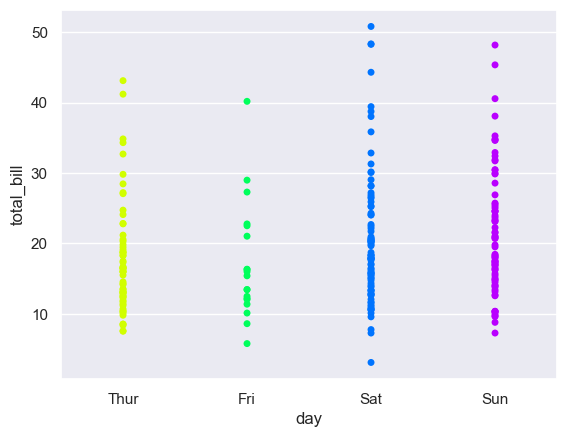

In [28]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=False, palette='hsv')

<AxesSubplot: xlabel='day', ylabel='total_bill'>

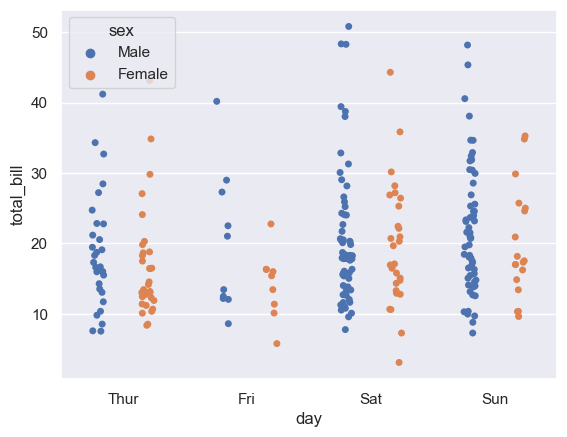

In [29]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True) #jitter is True by default. 
                                                                          #Is used to avoid stacked points
                                                                          #dodge=True here is the same than split=True

<AxesSubplot: xlabel='day', ylabel='total_bill'>

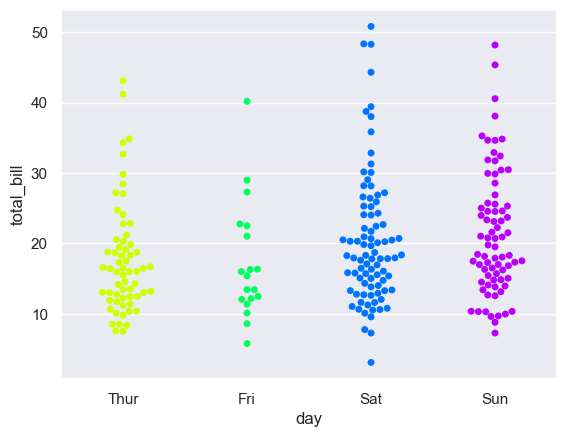

In [30]:
sns.swarmplot(x='day', y='total_bill', data=tips, palette='hsv') 
#it combines the violinplot and stripplot
#hard to intrpret or read.. is not often used

<AxesSubplot: xlabel='day', ylabel='total_bill'>

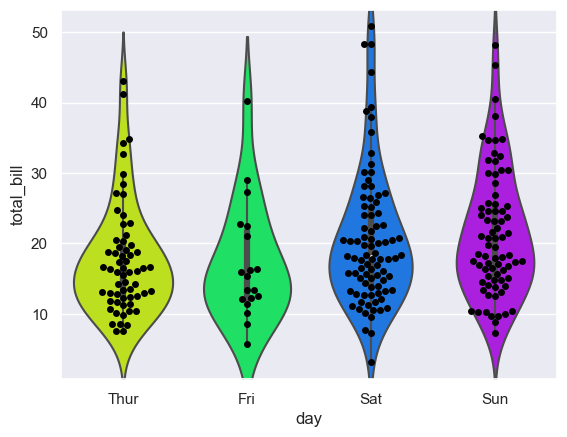

In [31]:
#you can stack the swarmplot and the violinplot itself
#hard to intrpret or read.. is not often used
sns.violinplot(x='day', y='total_bill', data=tips, palette='hsv')
sns.swarmplot(x='day', y='total_bill', data=tips, color='black')

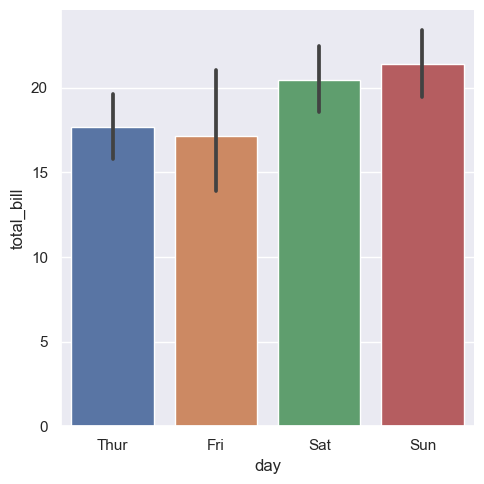

In [32]:
sns.catplot(x='day', y='total_bill', data=tips, kind='bar') #factorplot has been renamed to catplot

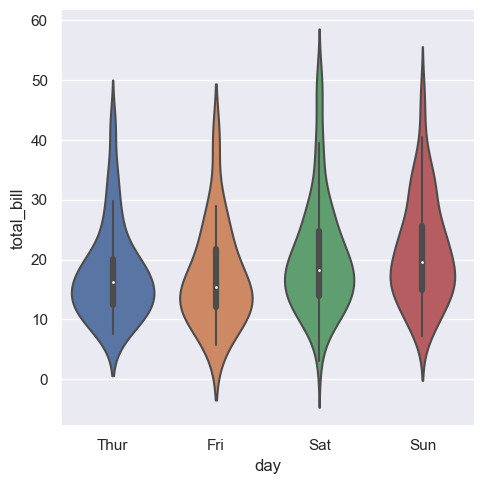

In [33]:
sns.catplot(x='day', y='total_bill', data=tips, kind='violin')

# Matrix Plots

In [34]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [37]:
#heatmaps

tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [38]:
tc = tips.corr()

<AxesSubplot: >

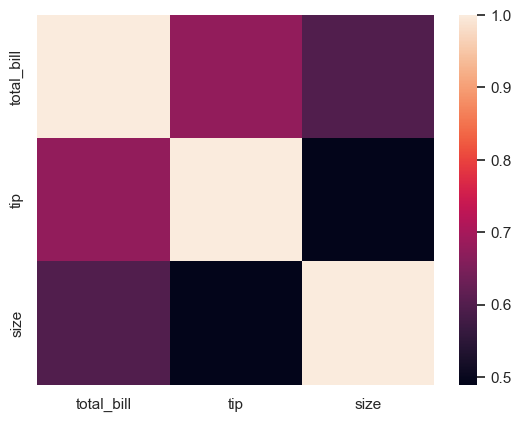

In [39]:
sns.heatmap(tc)

In [40]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot: >

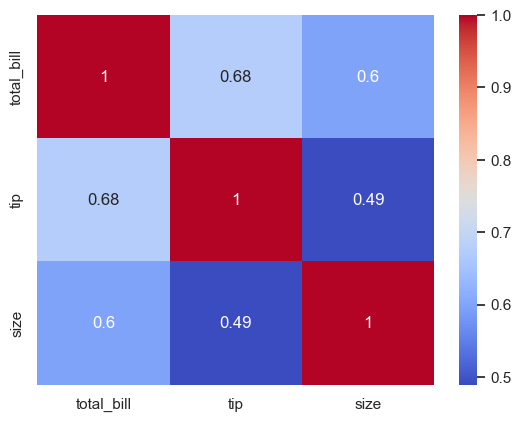

In [41]:
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [42]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [43]:
flights.pivot_table(index='month', columns='year', values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [44]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

<AxesSubplot: xlabel='year', ylabel='month'>

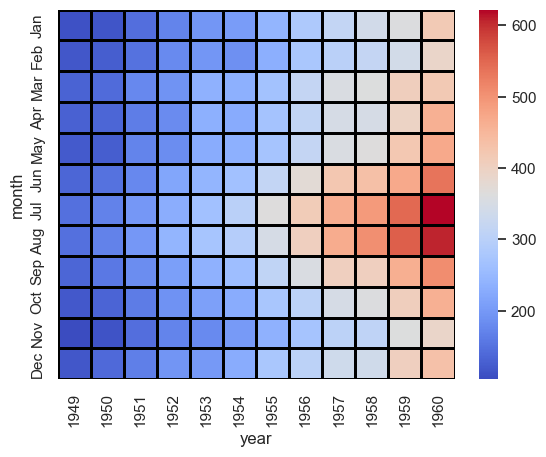

In [45]:
sns.heatmap(fp, cmap = 'coolwarm', linecolor='black', linewidths=2)

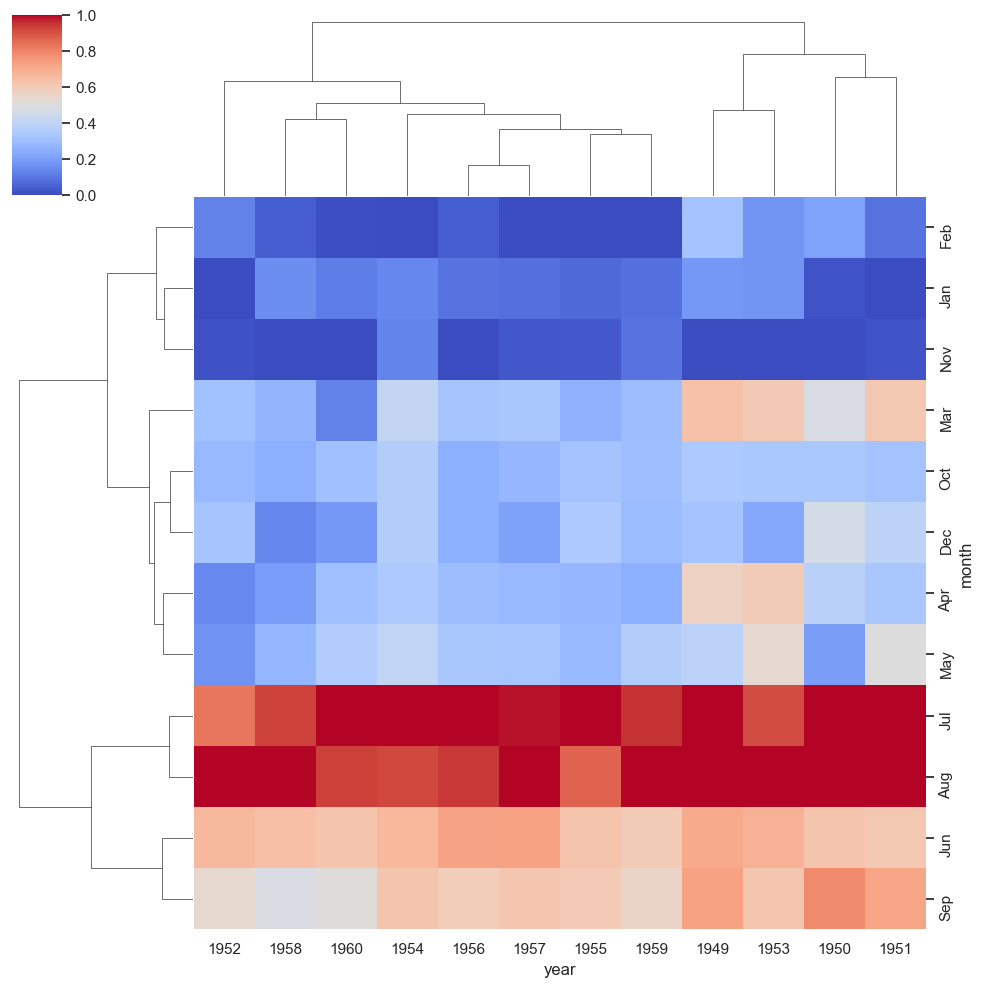

In [46]:
#cluster map

sns.clustermap(fp, cmap='coolwarm', standard_scale=1) # clusters of information to try to show columns 
                                                      # and rows are similar to each other.
                                                      # Similar months putting together. Years and months now are out of order

# Grids

In [47]:
iris = sns.load_dataset('iris')

In [48]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [49]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

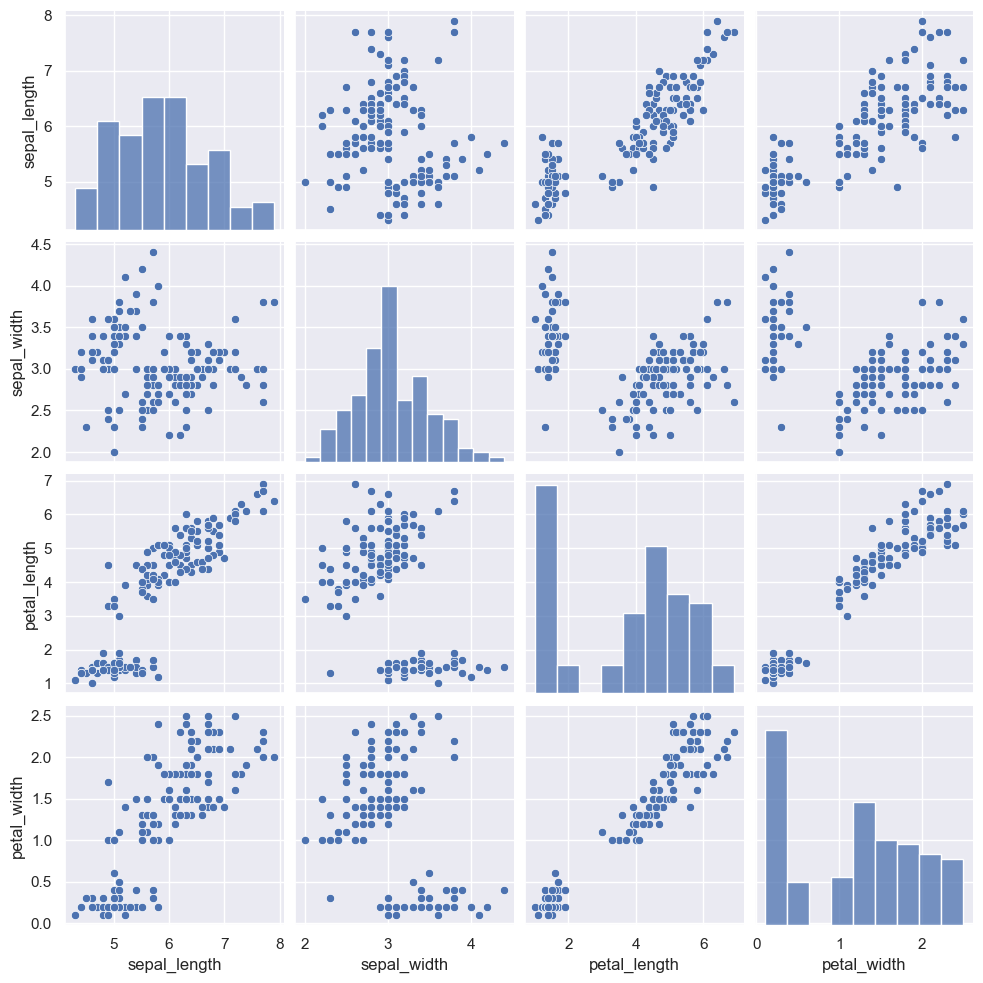

In [50]:
sns.pairplot(iris)

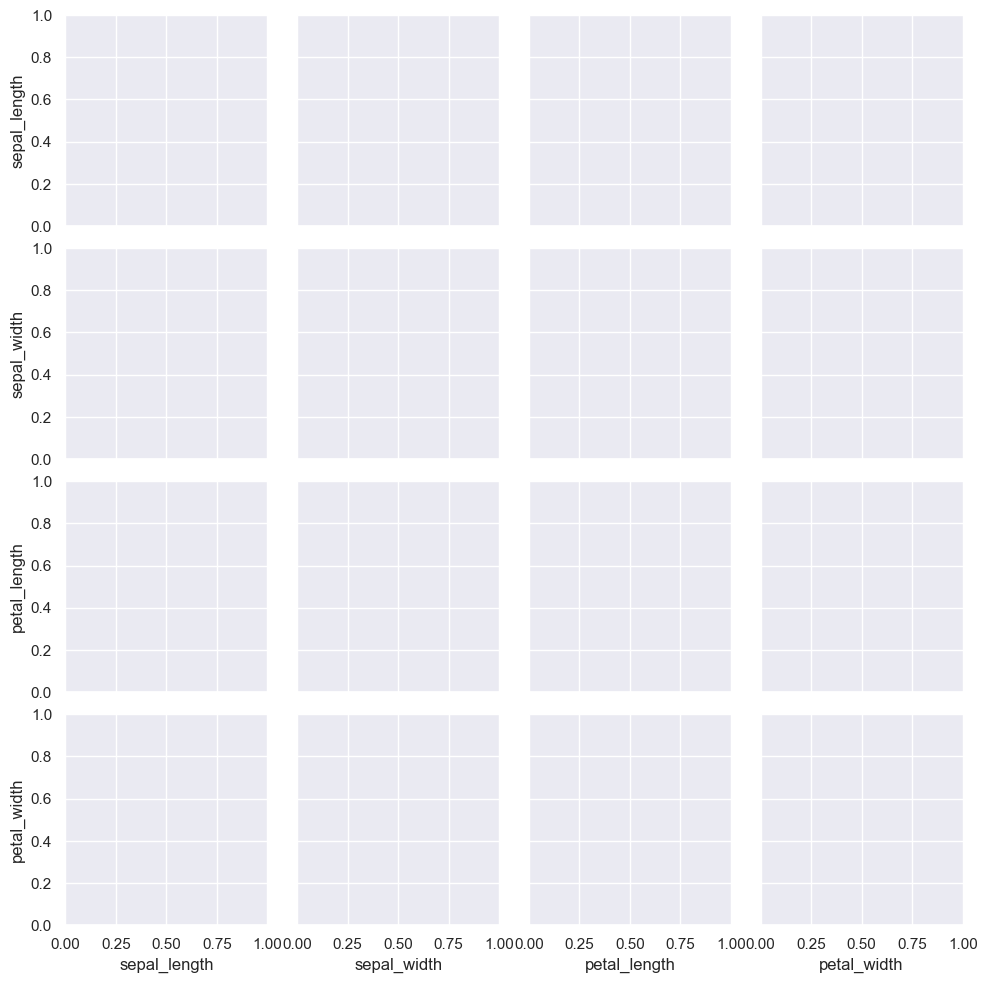

In [51]:
sns.PairGrid(iris)

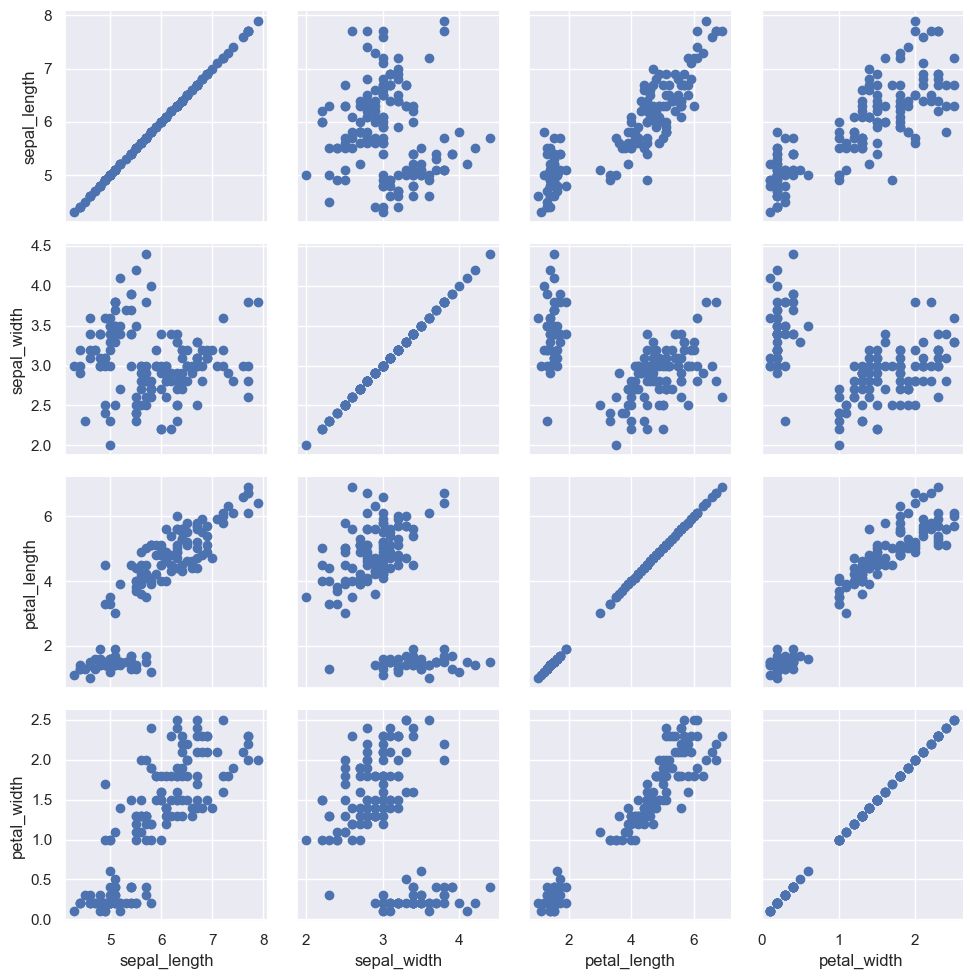

In [52]:
import matplotlib.pyplot as plt
g = sns.PairGrid(iris)
g.map(plt.scatter)

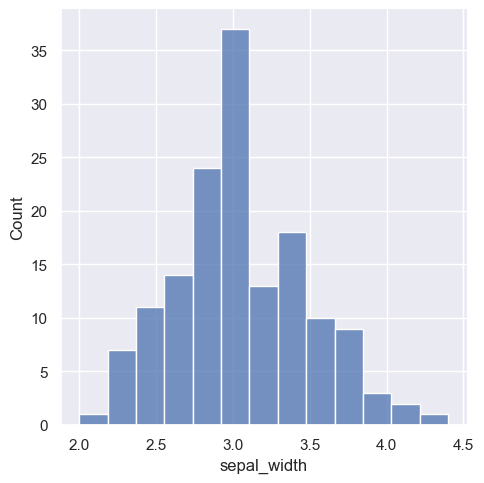

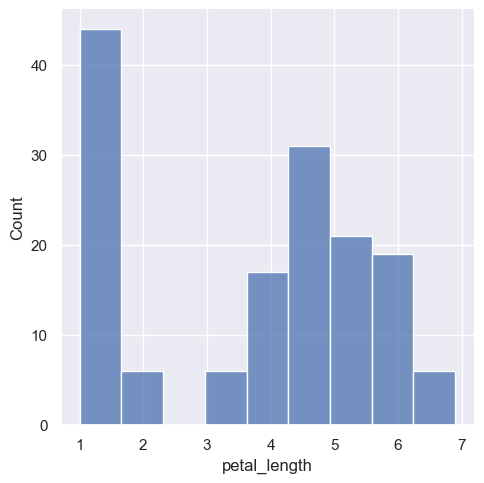

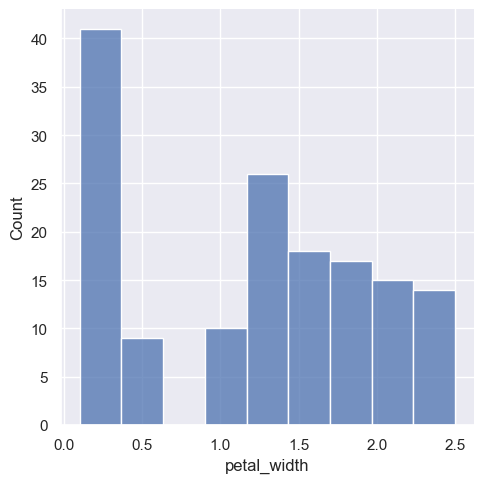

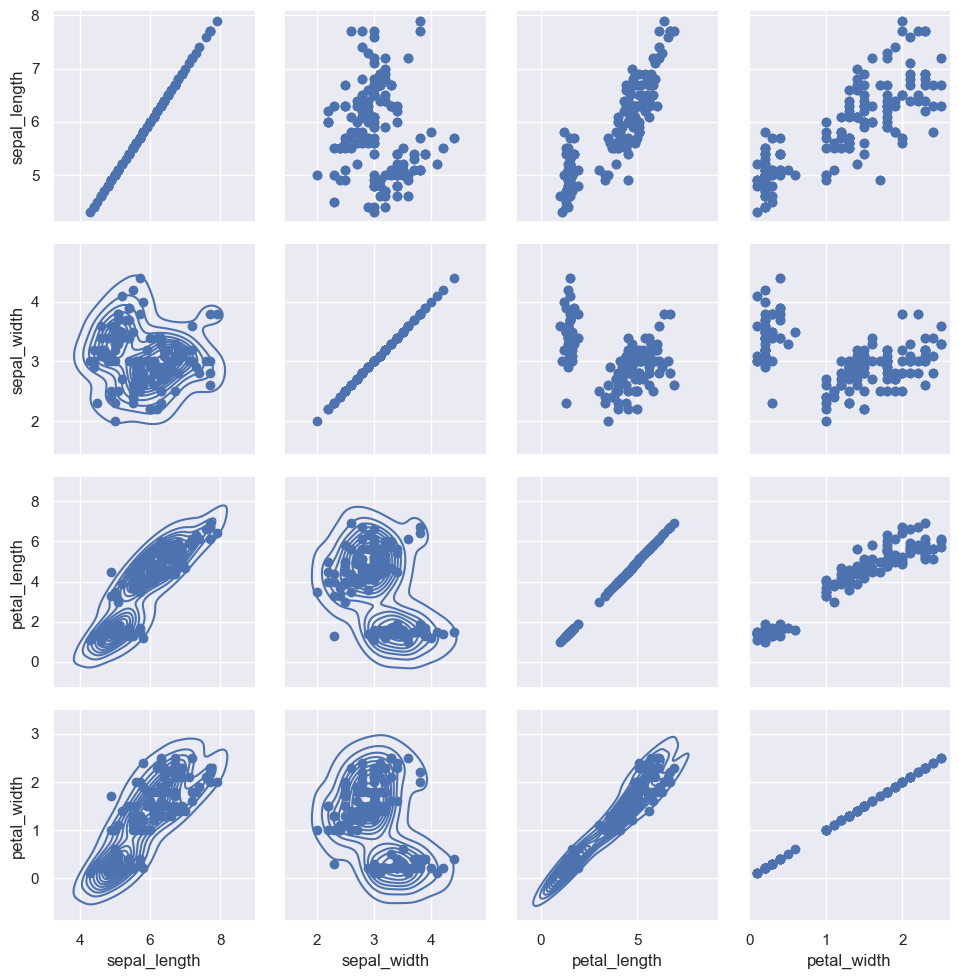

In [53]:
g.map_diag(sns.displot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [54]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


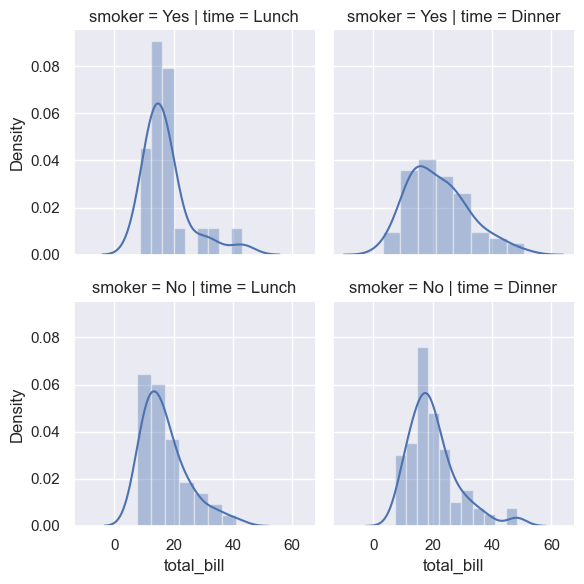

In [55]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(sns.distplot,'total_bill')

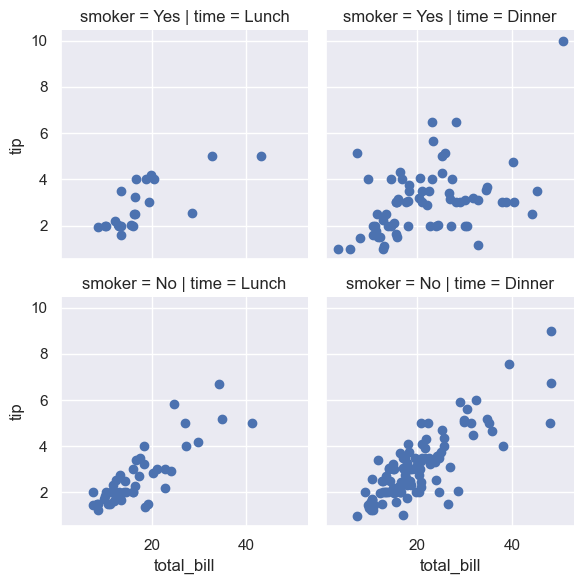

In [56]:
g = sns.FacetGrid(data=tips, col='time', row='smoker')
g.map(plt.scatter,'total_bill','tip') #if need more than one argument

# Regression Plots

In [57]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


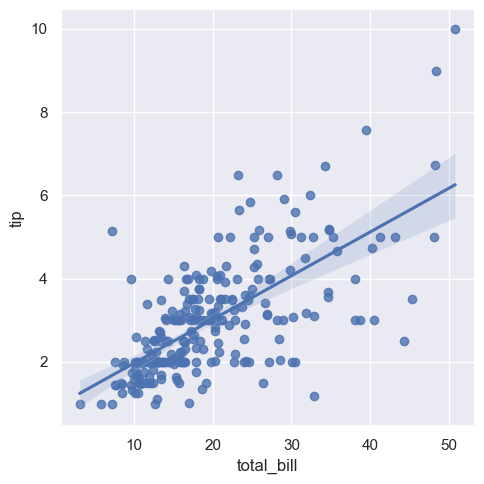

In [58]:
sns.lmplot(x='total_bill', y='tip', data=tips)

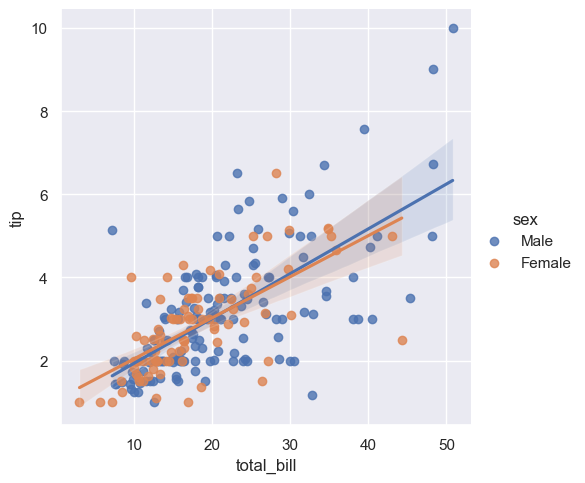

In [59]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

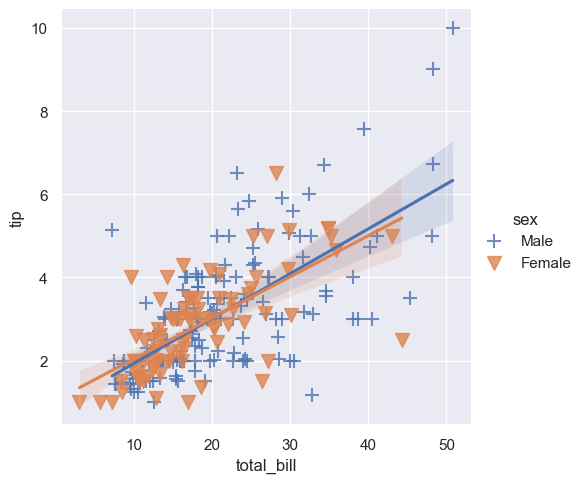

In [60]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['+','v'], scatter_kws={'s':100}) 
#to set markers and their size

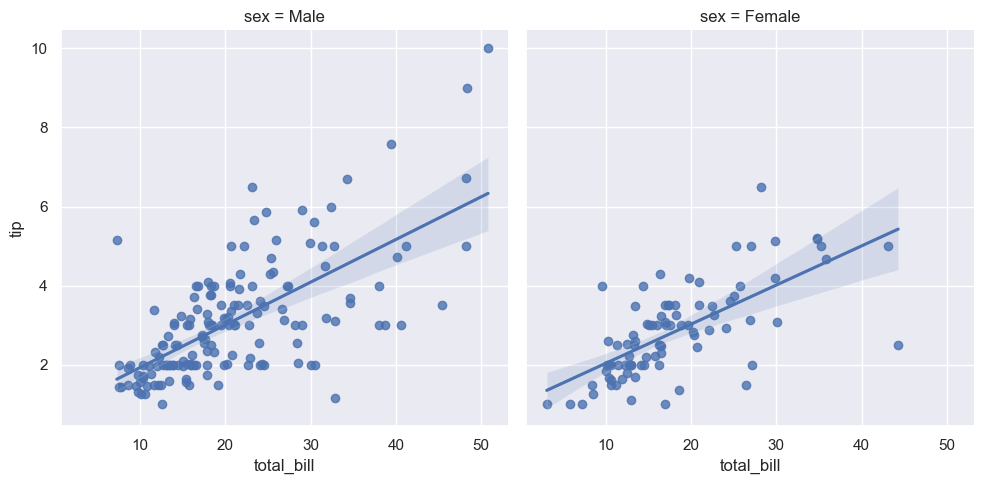

In [61]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex') #seperate by category

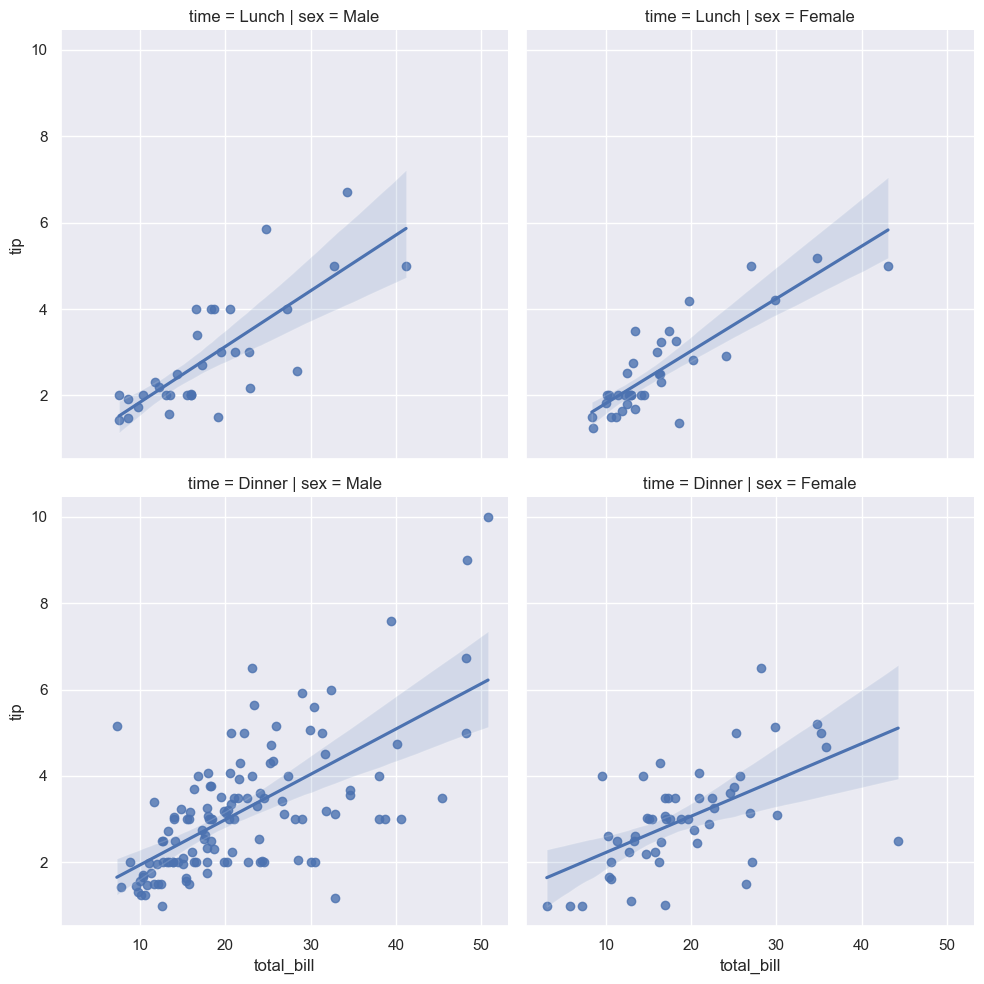

In [62]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex', row='time') #seperate by categories

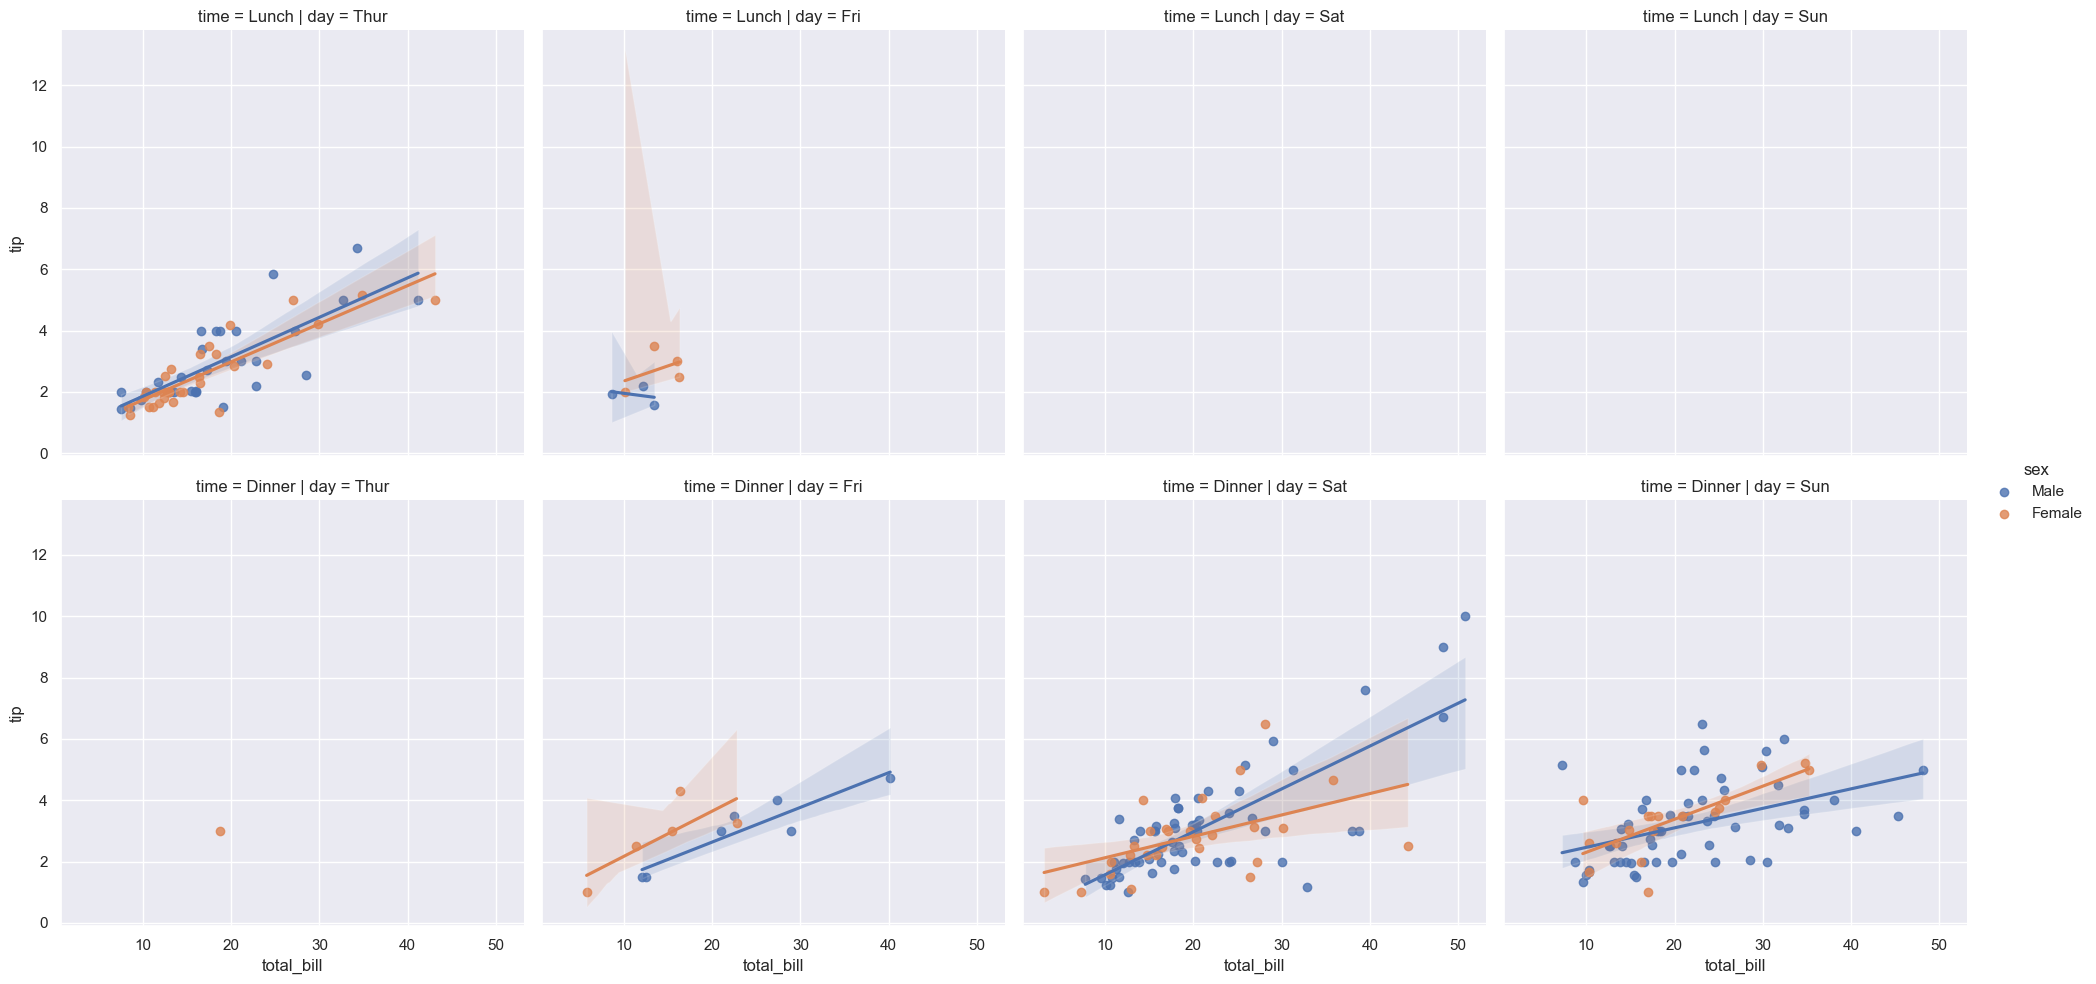

In [63]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', row='time', hue='sex') 
#also another vategorical variable more with 'hue'. But maybe too difficult to interpret

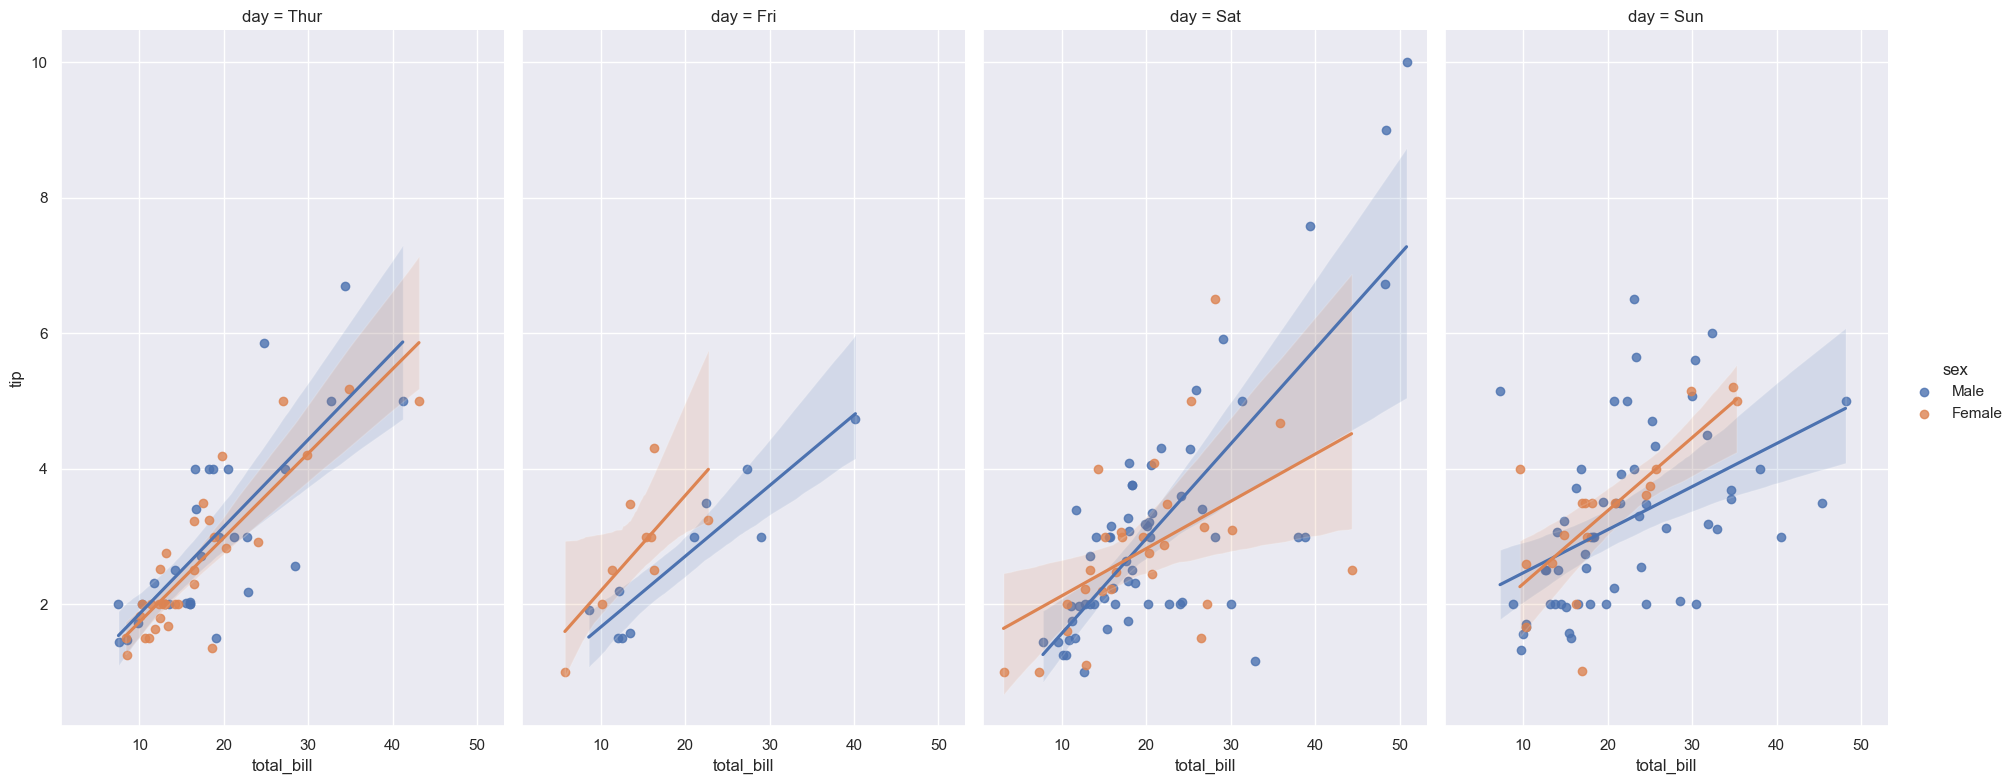

In [64]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex', aspect =0.6, height=8) #delete one variable and add aspect and size

# Style and Color

In [65]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='sex', ylabel='count'>

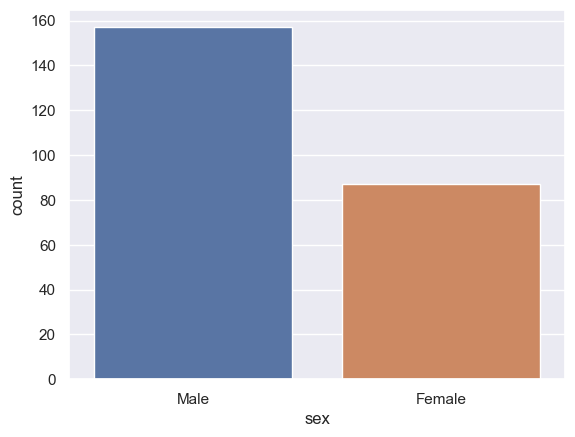

In [66]:
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

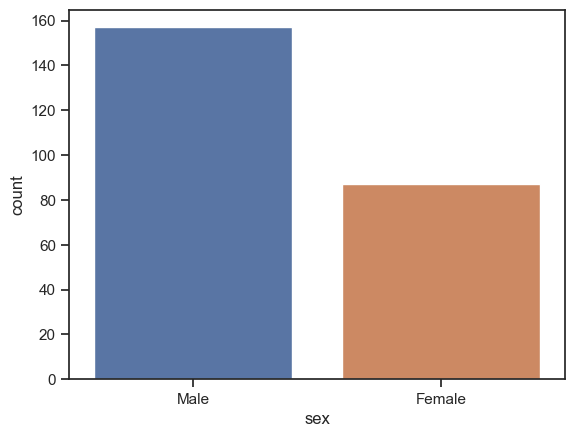

In [67]:
#styles
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

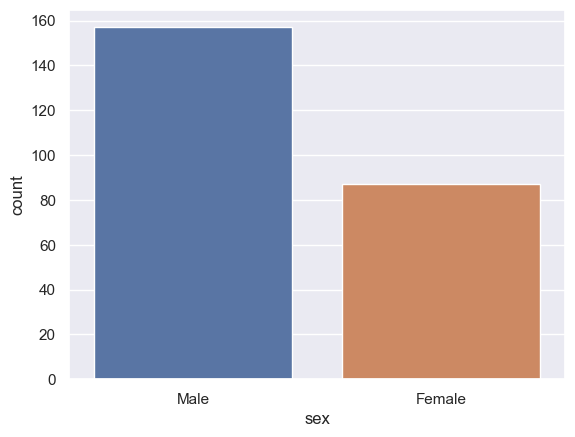

In [68]:
sns.set_style('darkgrid') # by default the style is darkgrid
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

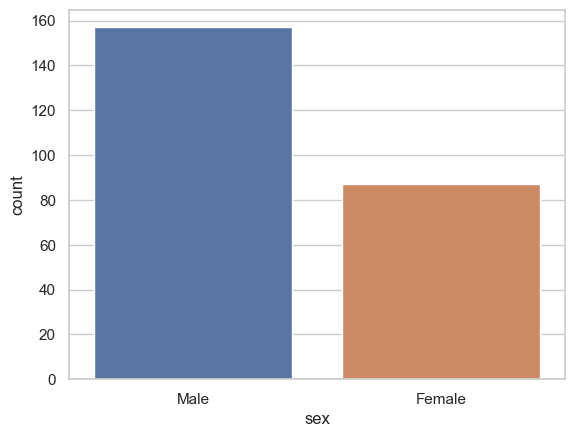

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

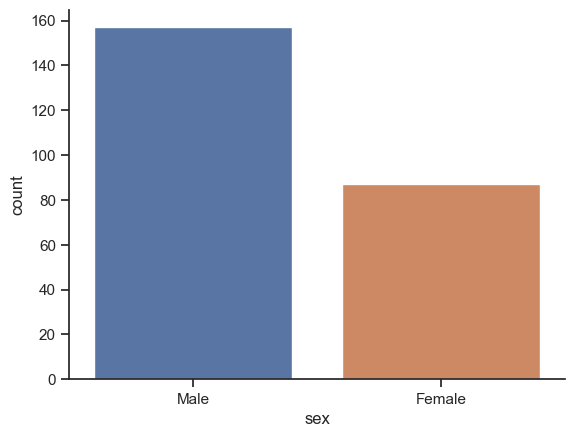

In [70]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine() # to remove border

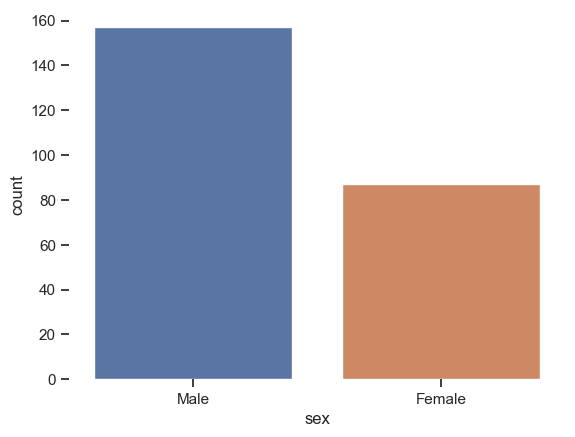

In [71]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine(left=True, bottom= True) # to remove border

<AxesSubplot: xlabel='sex', ylabel='count'>

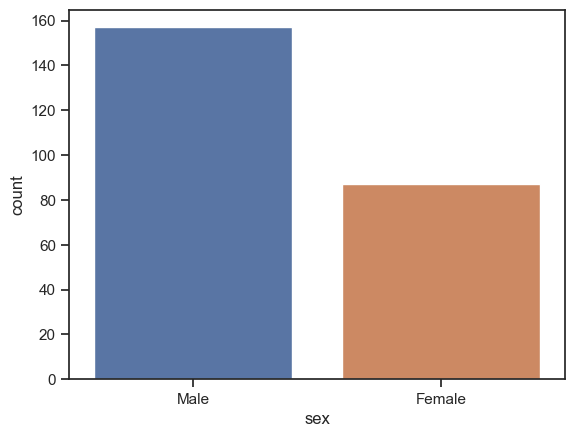

In [72]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

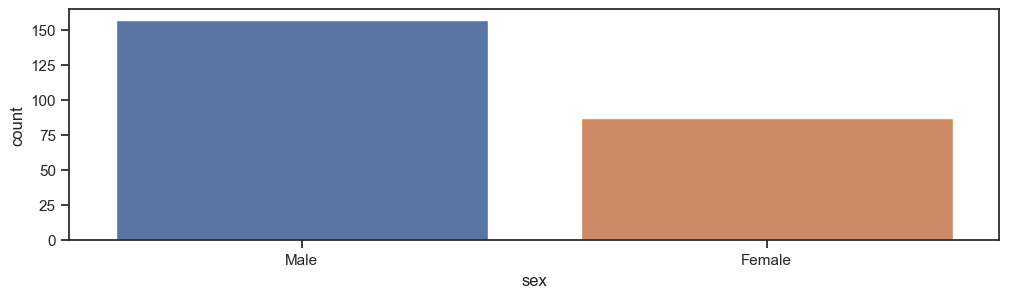

In [73]:
plt.figure(figsize=(12,3))
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

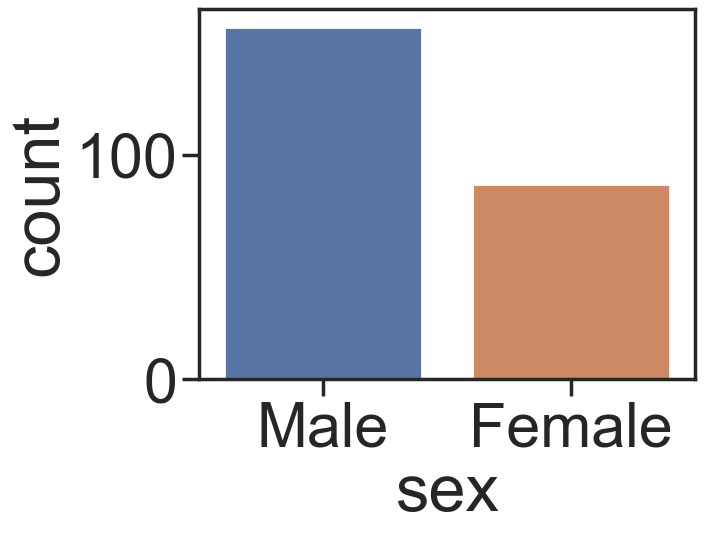

In [74]:
sns.set_context('poster', font_scale=2)
sns.countplot(x='sex', data=tips)

<AxesSubplot: xlabel='sex', ylabel='count'>

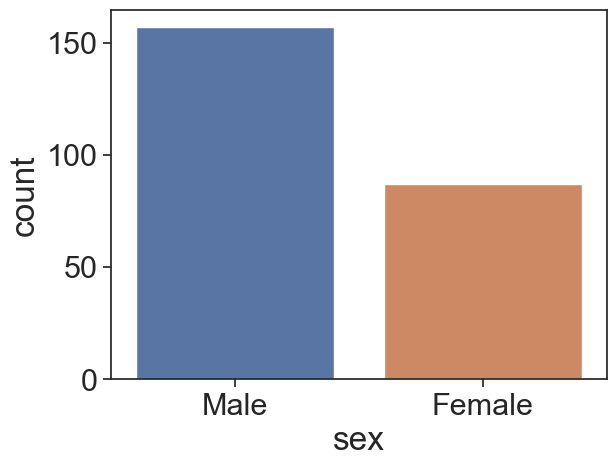

In [75]:
sns.set_context('notebook', font_scale=2) #by default the context is notebook
sns.countplot(x='sex', data=tips)

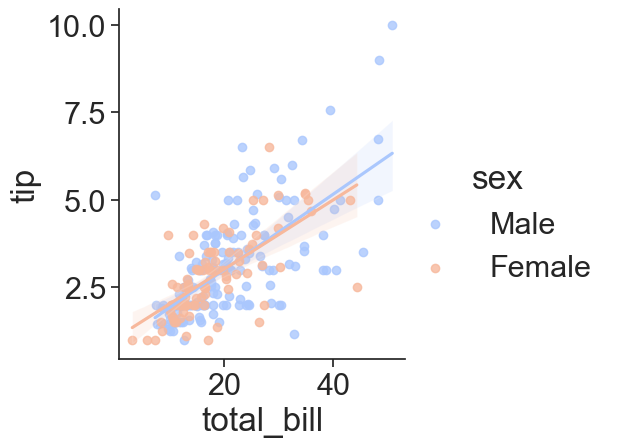

In [76]:
#palette
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='coolwarm')

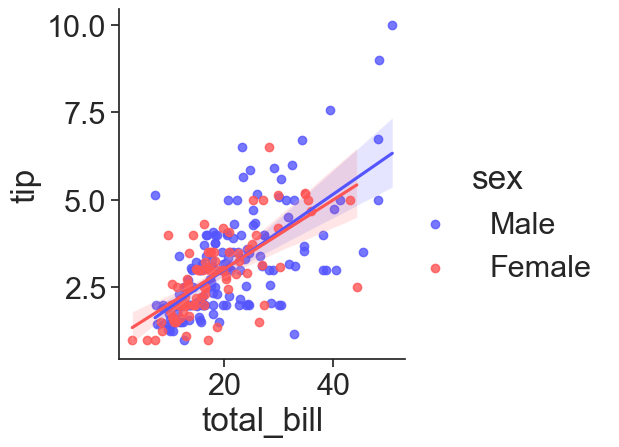

In [77]:
#palette
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='seismic')